Imports

In [40]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np

Carregar o Dataset

In [2]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()

Explorar os dados

In [3]:
print(imagens_treino.shape)
print(imagens_teste.shape)
print(len(identificacoes_treino))
print(len(identificacoes_teste))

(60000, 28, 28)
(10000, 28, 28)
60000
10000


Text(0.5, 1.0, '9')

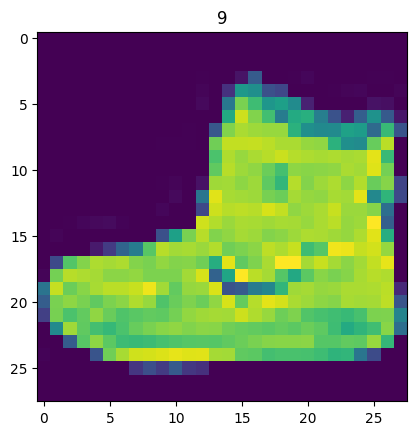

In [4]:
plt.imshow(imagens_treino[0])
plt.title(identificacoes_treino[0])

In [5]:
print(identificacoes_treino.min())
print(identificacoes_treino.max())
total_de_classificacoes = 10

0
9


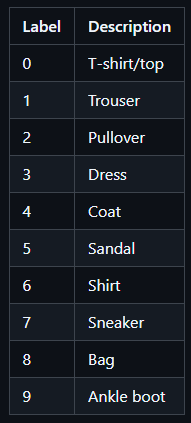

Exbir os dados

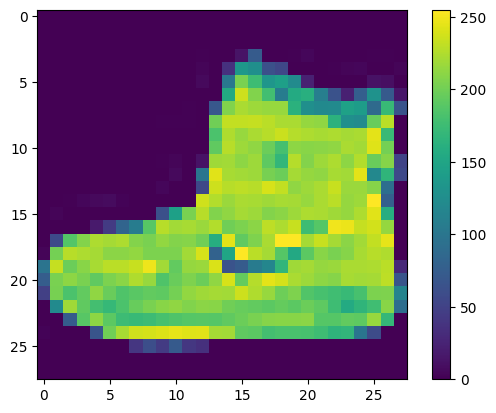

In [6]:
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover',
                           'Vestido', 'Casaco', 'Sandália',
                           'Camisa', 'Tênis', 'Bolsa', 'Bota']
'''
for imagem in range(10):
  plt.subplot(2, 5, imagem+1)
  plt.imshow(imagens_treino[imagem])
  plt.title(nomes_de_classificacoes[identificacoes_treino[imagem]])
'''
plt.imshow(imagens_treino[0])
plt.colorbar()

Normalizando as imagens

In [7]:
imagens_treino = imagens_treino / float(255) # dessa forma o gradiente de cor irá de 0 a 1 ao invés de 0 a 255 => Ajuda a diminuir a perda (loss)

Criando, compilando e treinando o modelo

In [36]:
modelo = keras.Sequential([
    # entrada
    keras.layers.Flatten(input_shape=(28, 28)),
    # Flatten achata a nossa imagem transformando ela de uma matriz com 28 linhas para um vetor de 1 linha
    # input_shape=(28, 28) é o tamanho da nossa imagem 28px por 28px

    # processamento (camadas ocultas)
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    # Dense significa que todos os nós dessa camada se conectam com todos os da camada anterior
    keras.layers.Dropout(0.2),
    # Dropout ajuda quando temos caso de overfitting, "desligando" parte dos nós

    # saída
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

modelo.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7639 - loss: 0.6754 - val_accuracy: 0.8342 - val_loss: 0.4387
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8522 - loss: 0.4056 - val_accuracy: 0.8658 - val_loss: 0.3730
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8681 - loss: 0.3651 - val_accuracy: 0.8711 - val_loss: 0.3553
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8754 - loss: 0.3325 - val_accuracy: 0.8746 - val_loss: 0.3431
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8771 - loss: 0.3286 - val_accuracy: 0.8792 - val_loss: 0.3321


Visualizando as acurácias de treino e validação por época

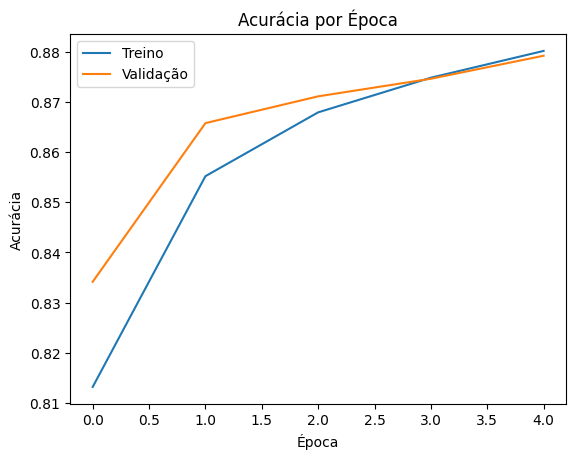

In [37]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por Época')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend(['Treino', 'Validação'])

Visualizando as perdas de treino e validação por época

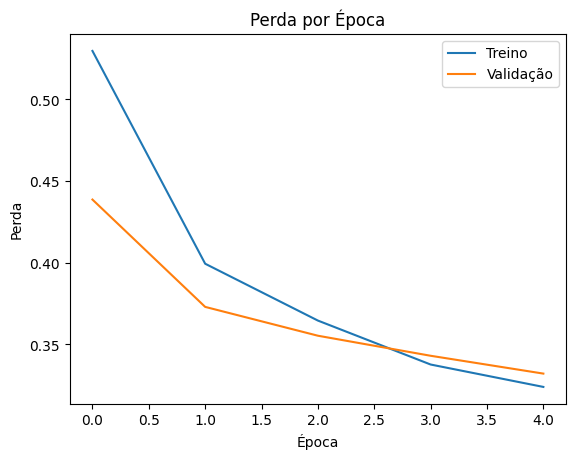

In [38]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por Época')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend(['Treino', 'Validação'])

Testando o modelo

In [20]:
testes = modelo.predict(imagens_teste)

print('Resultado teste: ', np.argmax(testes[1]))
print('Número da imagem de teste: ', identificacoes_teste[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Resultado teste:  2
Número da imagem de teste:  2


Avaliando o modelo

In [18]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print('Perda do teste: ', perda_teste)
print('Acuracia do teste: ', acuracia_teste)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8647 - loss: 49.6396
Perda do teste:  51.2769889831543
Acuracia do teste:  0.8629000186920166
